# <center>1.0 Read files, format and clean data

In [1]:
#import packages
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
#read files and create new dataframes
df_listings = pd.read_csv('../Data/Sample 2_Airbnb_listings.csv')
df_reviews= pd.read_csv('../Data/Sample 2_Airbnb_reviews.csv')
df_listings.head()
df_reviews.head()
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

##  Find budget properties in London

In [2]:
#1 find different host locations
df_listings['host_location'].value_counts()

London, England, United Kingdom               12330
GB                                             3822
England, United Kingdom                        3737
London, United Kingdom                         2353
London                                         1831
                                              ...  
West Hollywood, California, United States         1
Casalecchio di Reno, Emilia-Romagna, Italy        1
Malta                                             1
The University of Warwick                         1
Sofia, Sofia City Province, Bulgaria              1
Name: host_location, Length: 1391, dtype: int64

- we can see that the location london appears under different names
and some places in London such as 'Harrow' don't come under the name London

In [3]:
#create new df showing only london listings
df_london = df_listings[df_listings['host_location'].str.contains('London',na=False,case=False)]
df_london['host_location'].value_counts().head(10)

London, England, United Kingdom            12330
London, United Kingdom                      2353
London                                      1831
Greater London, England, United Kingdom      498
London, UK                                   196
london                                       104
london                                        77
London, Ontario, Canada                       75
LONDON                                        68
London                                        61
Name: host_location, dtype: int64

- we can see that there are many different types of locations that include "London", some of which aren't based in the UK

In [4]:
#to simplify, we will only use a subset of listings in London (still a very large subset)
#only include listings where the formatting is: London, England, United Kingdom  or London, United Kingdom                                    
df_london = df_london.loc[(df_london['host_location']=='London, England, United Kingdom')|(df_london['host_location']=='London, United Kingdom')]
df_london['host_location'].value_counts().head()

London, England, United Kingdom    12330
London, United Kingdom              2353
Name: host_location, dtype: int64

In [5]:
#check to see if there are null values in amenities
df_london['amenities'].isnull().sum()
#format price
def format_dollar(data):
    return(int(float(data.replace('$','').replace(',',''))))
df_london['price']=df_london['price'].apply(format_dollar)

In [6]:
#explore price variation, and select budget properties
df_london['price'].describe()

count    14683.000000
mean       120.669141
std        349.776243
min          0.000000
25%         45.000000
50%         75.000000
75%        127.000000
max      17806.000000
Name: price, dtype: float64

In [7]:
#min price is $0, therefore we remove any listings that are $0 from our dataframe
df_london = df_london[(df_london['price'] > 0)]

- we can see the mean average is around $121


In [8]:
#find budget properties with price less than 70
df_budget = df_london[(df_london['price'] <= 70)]
df_budget['price'].describe()

count    6919.000000
mean       43.667437
std        14.805171
min         8.000000
25%        30.000000
50%        42.000000
75%        55.000000
max        70.000000
Name: price, dtype: float64

- we have 6919 budget properties, and the mean price is around $44

# <center>2.0 Select a current listing and identify competitor set

In [9]:
#2.1 select a current listing that has price similar to the average of dataset
df_budget.loc[(df_budget['price'] == 44) & (df_budget['number_of_reviews']>50)]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2265,604185,https://www.airbnb.com/rooms/604185,20210411033700,2021-04-20,Lovely Double in Islington Near tube. Zone 2,"The room is compact, cosy, clean & tidy but it...",We are close to so many things on the Piccadil...,https://a0.muscache.com/pictures/65723702/eef2...,2990888,https://www.airbnb.com/users/show/2990888,...,10.0,10.0,10.0,NaN,f,1,0,1,0,6.14
2458,627920,https://www.airbnb.com/rooms/627920,20210411033700,2021-04-14,Double bedroom with ensuite Regents Canal Hackney,Stylish modern interior with balcony and with ...,NaN,https://a0.muscache.com/pictures/8058427/dfd70...,3118099,https://www.airbnb.com/users/show/3118099,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.73
6497,14233556,https://www.airbnb.com/rooms/14233556,20210411033700,2021-04-15,SAMARA - 3 CABINS with 6 BERTHS at SKD MARINA,"SAMARA is berthed at St Katharine Docks, Londo...",From the Marina the following features of Lond...,https://a0.muscache.com/pictures/c2726118-445d...,77269937,https://www.airbnb.com/users/show/77269937,...,9.0,10.0,9.0,NaN,t,1,0,1,0,2.98
6968,481099,https://www.airbnb.com/rooms/481099,20210411033700,2021-04-15,"Relaxing stay in leafy Hackney, E5","Spacious, light and comfortable room with comf...",Clapton is a much sought after neighbourhood -...,https://a0.muscache.com/pictures/5946431/e8fdf...,2382601,https://www.airbnb.com/users/show/2382601,...,10.0,10.0,10.0,NaN,f,2,1,1,0,1.00
18853,14318589,https://www.airbnb.com/rooms/14318589,20210411033700,2021-04-15,Comfortable double room in a modern flat.,"My place is good for couples, solo adventurers...",NaN,https://a0.muscache.com/pictures/ac45d922-d7ab...,13774091,https://www.airbnb.com/users/show/13774091,...,10.0,9.0,10.0,NaN,f,1,0,1,0,1.64
19487,6087109,https://www.airbnb.com/rooms/6087109,20210411033700,2021-04-15,The Glamour Cave,Join us in our beautiful Bow house share (zone...,Bow is a leafy residential neighbourhood betwe...,https://a0.muscache.com/pictures/77899006/0217...,9925109,https://www.airbnb.com/users/show/9925109,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.85
20139,20465288,https://www.airbnb.com/rooms/20465288,20210411033700,2021-04-14,Private double room in Flat-share Bayswater Lo...,This is a reasonable size Private Double-room ...,Very popular tourists area with lots of touris...,https://a0.muscache.com/pictures/c43023f9-1f56...,83740964,https://www.airbnb.com/users/show/83740964,...,10.0,10.0,9.0,NaN,f,116,106,10,0,2.52
26320,6607803,https://www.airbnb.com/rooms/6607803,20210411033700,2021-04-18,"Comfortable, bright, double bedroom.","My house in leafy, cosmopolitan Ealing is a tw...",Ealing is known as the Queen of the Suburbs. ...,https://a0.muscache.com/pictures/facc2c04-6642...,34574957,https://www.airbnb.com/users/show/34574957,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.80


- we have chosen listing with id:481099

In [10]:
#describe listing and offerings
current_listing = df_budget.loc[df_budget['id']==481099]
pd.options.display.max_rows = 100
display(current_listing.transpose())
pd.options.display.max_rows = 10


,6968
id,481099
listing_url,https://www.airbnb.com/rooms/481099
scrape_id,20210411033700
last_scraped,2021-04-15
name,"Relaxing stay in leafy Hackney, E5"
description,"Spacious, light and comfortable room with comf..."
neighborhood_overview,Clapton is a much sought after neighbourhood -...
picture_url,https://a0.muscache.com/pictures/5946431/e8fdf...
host_id,2382601
host_url,https://www.airbnb.com/users/show/2382601


In [11]:
print(current_listing['description'])

6968    Spacious, light and comfortable room with comf...
Name: description, dtype: object


In [12]:
#display amenitites
for item in (current_listing['amenities']):
    print(item)

["Paid parking off premises", "Essentials", "Kitchen", "Host greets you", "Washer", "Hair dryer", "Hangers", "Dedicated workspace", "Shampoo", "Lock on bedroom door", "Hot water", "Wifi", "Carbon monoxide alarm", "Heating", "Iron", "Dryer"]


## Visualise data

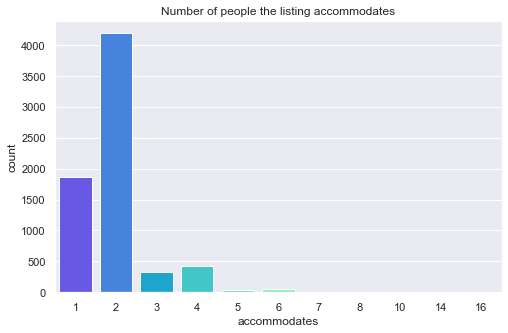

In [13]:
#plot count of accommodates
sns.set_theme()
plt.figure(figsize=(8,5));
plot1=sns.countplot(x='accommodates',data=df_budget, palette='rainbow')
plt.title("Number of people the listing accommodates");

- we can see that that most listings accommodate 2 people

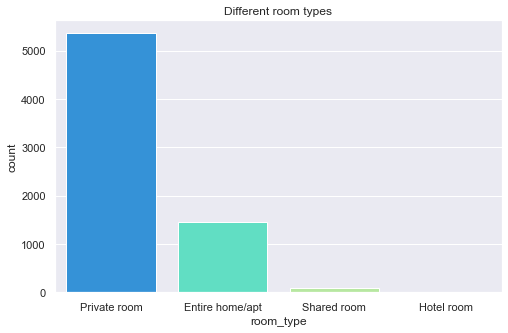

In [14]:
#plot count of different room types
plt.figure(figsize=(8,5))
sns.countplot(x='room_type',data=df_budget, palette='rainbow')
plt.title("Different room types");

- private rooms are the most common

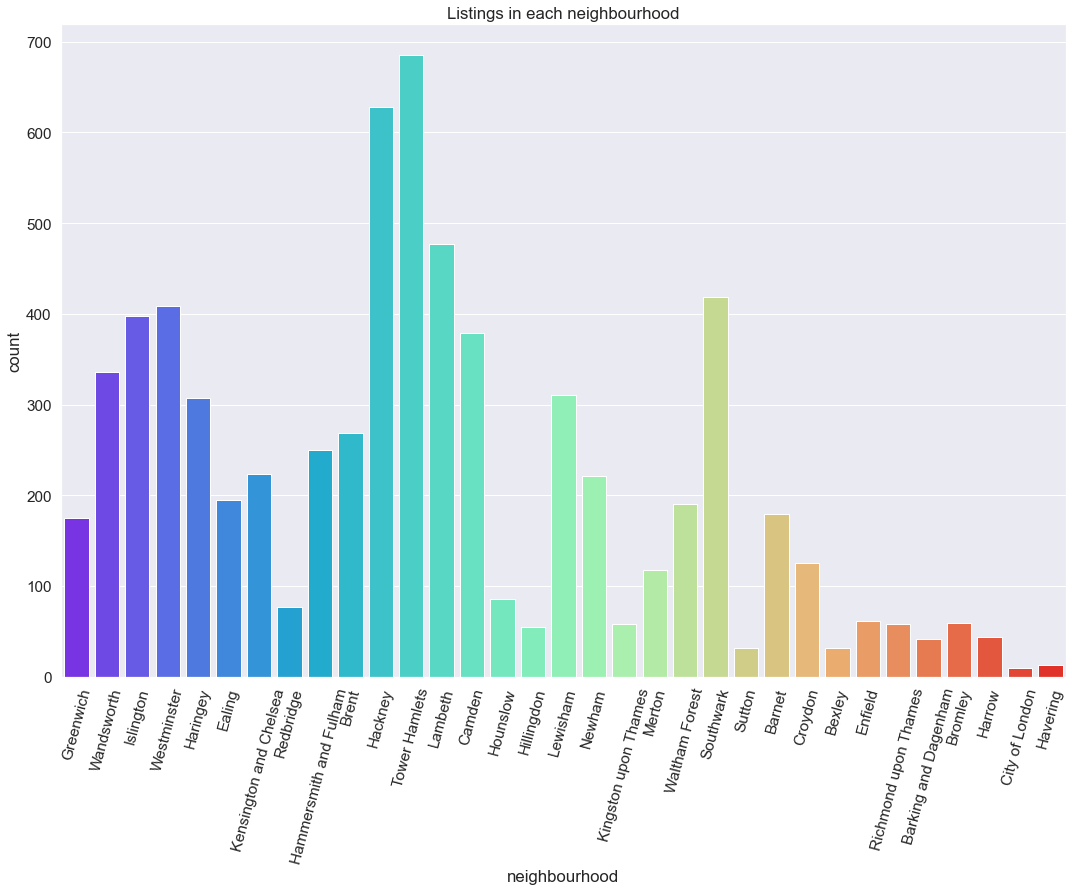

In [15]:
#display number of listings in each neighbourhood
plt.figure(figsize=(18,12))
sns.set(font_scale=1.4);

sns.countplot(x='neighbourhood_cleansed',data=df_budget, palette='rainbow');
plt.title("Listings in each neighbourhood");
plt.xticks(rotation=75);
plt.xlabel('neighbourhood');

- we can see that Hackey is the 2nd most popular neighbourhood, after Tower Hamlets

##  <center>3.0 Sentiment Analysis

In [16]:
#clean text by removing NaN values
df_reviews= pd.read_csv('../Data/Sample 2_Airbnb_reviews.csv')
df_reviews.head()
df_reviews = df_reviews[~df_reviews['comments'].isna()]

In [17]:
#use VADER sentiment analytics tool to estimate sentiment of the text
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer = SentimentIntensityAnalyzer()
def calculate_sentiment(comment):
    return(scorer.polarity_scores(comment)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
#sample sentiment calculation
N=20
df_reviews_sample = df_reviews.sample(N)
df_reviews_sample.loc[:,'sentiment'] = df_reviews_sample['comments'].apply(calculate_sentiment)
df_reviews_sample.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
69159,5168353,79013788,2016-06-10,71074313,Stephen,Very much enjoyed staying with Josephine for a...,0.8744
27827,14410607,99903164,2016-09-06,89925323,Vardaan,James is one of the best hosts anyone could ev...,0.9806
24565,9665686,70079195,2016-04-16,24754250,Elisabeth,Spacious and warm studio; excellent location c...,0.9618
21581,13584735,245423097,2018-03-22,6567491,Kevin,Excellent as always,0.5719
10568,20659535,244728409,2018-03-19,35153489,Helene,Great basement flat in a terrific location. We...,0.9738
53299,20788377,575138348,2019-12-09,307815808,Lara,Forba was an extremely comprehensive host. We ...,0.9144
47279,2897363,448640880,2019-05-05,42514075,Victoria,A lovely Victorian house situated in a very qu...,0.9641
75538,14458121,367194494,2019-01-04,48968158,Daniel,You cannot beat the location. Walking distance...,0.4215
42582,20683107,474751152,2019-06-23,42295209,Paolo,"Great position, the closest underground statio...",0.8775
99301,3498228,76021033,2016-05-24,33475329,Christopher,Stephanies Wohnung war wunderbar! Sie ist sehr...,-0.8439


- note here that some comments are in different languages! it seems that they have a sentiment of 0

In [19]:
#drop all reviews not in budget listings

#calculate how many budget reviews we should have based on 'number_of_reviews'
total = df_listings['number_of_reviews'].sum()
print("expected number of total reviews",total)
totalbudget = df_budget['number_of_reviews'].sum()
print("expected number of budget reviews:",totalbudget)

#calculate actual number of reviews
total = len(df_reviews.index)
print("number of total reviews",total)

budget_listings = df_budget['id'].tolist()
budget_reviews = df_reviews[df_reviews['listing_id'].isin(budget_listings)]

totalbudget = len(budget_reviews.index)
print("number of budget reviews:",totalbudget)

expected number of total reviews 452706
expected number of budget reviews: 141025
number of total reviews 99964
number of budget reviews: 12484


- we have significantly less reviews than expected

In [20]:
#check current listing, to see if budget_reviews contains the list of all the budget listings from df_reviews
df_reviews.loc[df_reviews['listing_id']==481099]
budget_reviews.loc[budget_reviews['listing_id']==481099]

,listing_id,id,date,reviewer_id,reviewer_name,comments
4331,481099,9908218,2014-01-18,11208394,Tim,I had a great two night stay with Tim and fami...
16120,481099,283254003,2018-06-29,145793903,Nadeem,"A nice, clean and well-presented room in a fam..."
40738,481099,9085320,2013-12-05,3506595,Heiko And Lea,I really loved staying in this beautiful room ...
42710,481099,492543027,2019-07-21,15334423,Rebecca,Really nice spacious clean room . Well placed...
49912,481099,3377669,2013-01-20,4119051,Jef,"Very nice room in trendy East London. Bright, ..."
67874,481099,109107351,2016-10-19,3833334,Aliki,The guys were amazing!! I didn't have my lugga...
80961,481099,274079668,2018-06-08,35696808,Becky,"I had a great stay, it was super a homely and ..."
96619,481099,32336899,2015-05-17,28418380,Lisa,My dad stayed here for almost a week. Everythi...


- we can see they match, verifying that we have successfully identified reviews from only budget listings

## Apply sentiment calculation to all reviews in budget

In [21]:
#calcuate averview number of reviews
avg_number_of_reviews = budget_reviews['listing_id'].value_counts().agg(['mean'])
print(avg_number_of_reviews)

mean    4.374212
Name: listing_id, dtype: float64


- average number of reviews per listing is 4.37

In [22]:
#filter out only those listings that have 4 or more reviews
listing_count = budget_reviews['listing_id'].value_counts()
valid_listings = listing_count[listing_count>=4].index

In [23]:
#filter budget_reviews again, for only valid listings
df_budget_reviews = budget_reviews[budget_reviews['listing_id'].isin(valid_listings)]
len(df_budget_reviews)

9486

- we can see that we still have 9486 reviews that are both budget listings and has 4 or more reviews

In [24]:
#Then we calculate the sentiment score for these reviews
df_budget_reviews.loc[:,'sentiment'] = df_budget_reviews['comments'].apply(calculate_sentiment)
df_budget_reviews.head()
df_budget_reviews['sentiment'].describe()

C:\Users\Nik\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


count    9486.000000
mean        0.727023
std         0.385902
min        -0.991100
25%         0.680800
50%         0.901450
75%         0.959875
max         0.999300
Name: sentiment, dtype: float64

- we can see the average sentiment score for a review is 0.73, which is quite high

## Calculate average sentiment score per listing


In [25]:
#group each sentiment score by listing_id
listings_scored = df_budget_reviews.groupby('listing_id')['sentiment'].agg(['mean']).reset_index()
listings_scored.head()
listings_scored['mean'].describe()

count    1014.000000
mean        0.731142
std         0.170801
min        -0.017775
25%         0.642456
50%         0.761523
75%         0.858616
max         0.980150
Name: mean, dtype: float64

- we now have 1014 listings that are both budget and have >= 4 reviews
- suprisingly the minimum average sentiment score is only -0.017

In [26]:
#add average sentiment score to df_budget, by merging listings_scored and df_budget
df_budget_sentiment =pd.merge(df_budget, listings_scored, how='left', left_on=['id'],right_on=['listing_id'])
df_budget_sentiment.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,mean
0,392246,https://www.airbnb.com/rooms/392246,20210411033700,2021-04-16,Private bathroom Free parking West Thamesmead,Nice and modern bedroom located on the ground ...,The house is located on a square in a resident...,https://a0.muscache.com/pictures/17010cbe-7fc6...,1961516,https://www.airbnb.com/users/show/1961516,...,10.0,NaN,f,1,0,1,0,0.16,NaN,NaN
1,29098736,https://www.airbnb.com/rooms/29098736,20210411033700,2021-04-16,"A Spacious, light, airy room in Battersea","Two minutes from beautiful Battersea Park, thi...",Battersea is a vibrant and leafy part of South...,https://a0.muscache.com/pictures/1eebfa23-2c2f...,36868988,https://www.airbnb.com/users/show/36868988,...,10.0,NaN,t,1,0,1,0,2.35,29098736.0,0.900571
2,37015208,https://www.airbnb.com/rooms/37015208,20210411033700,2021-04-12,"Double Bedroom with en-suite, 5mins from Angel.",- 2-bedroom apartment conveniently located bet...,Clerkenwell is a very central location to all ...,https://a0.muscache.com/pictures/4c79f803-1457...,9131044,https://www.airbnb.com/users/show/9131044,...,NaN,NaN,f,1,0,1,0,NaN,NaN,NaN
3,356978,https://www.airbnb.com/rooms/356978,20210411033700,2021-04-14,"Double room with Garden view, Females only.","Trendy bright area, near to Kensal Town, Porto...",The area where I live is safe and has real com...,https://a0.muscache.com/pictures/54137972/1d28...,1811246,https://www.airbnb.com/users/show/1811246,...,9.0,NaN,f,1,0,1,0,0.08,NaN,NaN
4,47949758,https://www.airbnb.com/rooms/47949758,20210411033700,2021-04-17,Newly Refurbished Bright And Spacious W1 Studio,Hi guys. My flat is really centrally located r...,"The neighbourhood is extremely safe, clean, ce...",https://a0.muscache.com/pictures/miso/Hosting-...,155075872,https://www.airbnb.com/users/show/155075872,...,NaN,NaN,f,39,39,0,0,NaN,NaN,NaN


In [27]:
#remove rows with NaN values 
df_budget_clean = df_budget_sentiment.dropna(subset=['mean']).reset_index()
#clean dataframe
df_budget_clean= df_budget_clean[['listing_id','host_id','host_is_superhost','neighbourhood_cleansed','longitude','latitude','accommodates','bedrooms','bathrooms','property_type',
                                  'amenities','room_type','price','review_scores_rating','mean']]
df_budget_clean=df_budget_clean.rename(columns={"mean": "avg_sentiment_score", "review_scores_rating": "reviews_rating",
                                "neighbourhood_cleansed":"neighbourhood"})

## Benchmark performance of current listing

In [28]:
df_budget_clean.loc[df_budget_clean['listing_id']==481099]

,listing_id,host_id,host_is_superhost,neighbourhood,longitude,latitude,accommodates,bedrooms,bathrooms,property_type,amenities,room_type,price,reviews_rating,avg_sentiment_score
260,481099.0,2382601,t,Hackney,-0.04923,51.55865,2,1.0,NaN,Private room in house,"[""Paid parking off premises"", ""Essentials"", ""K...",Private room,44,97.0,0.907375


- we can see that our listing has a very high average sentiment score of 0.907, and also a high reviews rating of 97.0

In [29]:
#average sentiment score by accommodates
df_budget_clean.groupby(["accommodates"]).agg(mean_avg_score=("avg_sentiment_score", np.mean))

,mean_avg_score
accommodates,
1,0.762171
2,0.738520
3,0.647076
4,0.645963
5,0.700057
6,0.723562
8,0.805250


In [30]:
#average sentiment score by room tye
df_budget_clean.groupby(["room_type"]).agg(mean_avg_score=("avg_sentiment_score", np.mean))

,mean_avg_score
room_type,
Entire home/apt,0.693876
Hotel room,0.675263
Private room,0.737432
Shared room,0.619143


In [31]:
#top 5 neighbourhoods by sentiment score
neighbourhood_sentiment = df_budget_clean.groupby(["neighbourhood"]).agg(mean_avg_score=("avg_sentiment_score",np.mean)).sort_values(by=['mean_avg_score'], ascending=False)
neighbourhood_sentiment.head(5)

,mean_avg_score
neighbourhood,
Bromley,0.842765
Redbridge,0.812993
Richmond upon Thames,0.786485
Lewisham,0.780189
Merton,0.773896


In [32]:
#bottom 5 neighbourhoods by sentiment score
neighbourhood_sentiment.tail(5)

,mean_avg_score
neighbourhood,
Bexley,0.673520
Harrow,0.660149
Brent,0.641846
Kingston upon Thames,0.640382
Barking and Dagenham,0.610001


In [33]:
#Current listing neighbourhood: Hackney, comparison
neighbourhood_sentiment.loc['Hackney']

mean_avg_score    0.7586
Name: Hackney, dtype: float64

- mean sentiment score for Hackney is 0.759

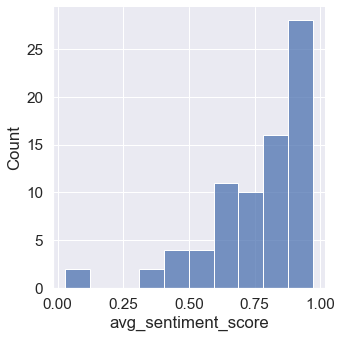

In [34]:
#plot to show hackey sentiment values
hackney_sentiment = df_budget_clean.loc[df_budget_clean['neighbourhood']=='Hackney']
sns.displot(hackney_sentiment['avg_sentiment_score'],bins=10);

- we can see that sentiment scores between 0.9 and 1 are very common in Hackney...

## How does the current listing's sentiment score compare to budget population?

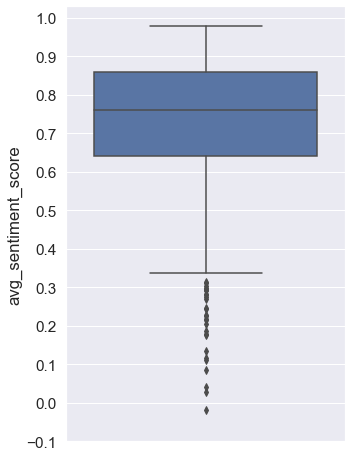

In [35]:
#box and whisker plot
plt.figure(figsize = (5,8));
plot =sns.boxplot(y=df_budget_clean['avg_sentiment_score']);
plot.set_yticks(np.arange(-0.1,1.01, 0.1));
plt.show;

- data is skewed towards higher sentiment scores
- we can see that our current listing lies above the upper quartile

## Investigate any relationship between rating and sentiment score

- possible indicator of strength of the sentiment analysis
- positive correlation would imply sentiment analysis accurately depicts true customer satisfaction towards listing

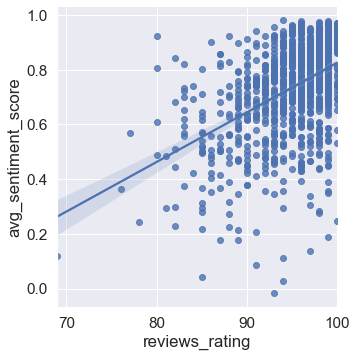

In [36]:
#plot reviews rating against avg_sentiment_score
sns.lmplot(x='reviews_rating',y='avg_sentiment_score',data=df_budget_clean);

- perhaps a slight postitive correlation
- graph is fairly inconclusive as there is a lot of spread in the data

# <center>4.0 Clustering analysis

## Pre-process data


In [37]:
#convert strings to list using json package
import json
df_budget_clean['amenities_list'] = df_budget_clean['amenities'].apply(lambda s : json.loads(s))
df_budget_clean[['amenities','amenities_list']].head()

,amenities,amenities_list
0,"[""Washer \u2013\u00a0In unit"", ""Bed linens"", ""...","[Washer – In unit, Bed linens, Hangers, Fire e..."
1,"[""TV"", ""Essentials"", ""Host greets you"", ""Hair ...","[TV, Essentials, Host greets you, Hair dryer, ..."
2,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","[TV, Essentials, Kitchen, Washer, Hangers, Ele..."
3,"[""Essentials"", ""Host greets you"", ""Hair dryer""...","[Essentials, Host greets you, Hair dryer, Sham..."
4,"[""Extra pillows and blankets"", ""Essentials"", ""...","[Extra pillows and blankets, Essentials, TV, H..."


In [38]:
#create binary indicators
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
amenities_binary = mlb.fit_transform(df_budget_clean['amenities_list'])
#create new data frame combining amenities and listings
X_data = pd.DataFrame(amenities_binary ,columns=mlb.classes_, index=df_budget_clean['listing_id'])
X_data.head()

,"20"" HDTV","24"" HDTV with Netflix, Amazon Prime Video","32"" TV with Netflix","34"" HDTV with Netflix",Air conditioning,BBQ grill,Baby bath,Baby monitor,Baby safety gates,Babysitter recommendations,...,Washer,Washer – In unit,Waterfront,Wifi,Wifi – 200 Mbps,Wifi – 70 Mbps,Window AC unit,Window guards,Wine glasses,Zanussi ZOP37982XK stainless steel oven
listing_id,,,,,,,,,,,,,,,,,,,,,
29098736.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1002115.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21255126.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
33668694.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
39173550.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
#filter to include only amenities that appear greater than the mean average
X_data.sum().describe()
X_final = X_data[X_data.columns[X_data.sum()>(X_data.sum().mean())]]

In [40]:
#show head of df
X_final.head()

,Backyard,Bed linens,Breakfast,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,Dryer,...,Paid parking off premises,Patio or balcony,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi
listing_id,,,,,,,,,,,,,,,,,,,,,
29098736.0,0,1,0,1,1,1,1,1,0,0,...,0,0,0,1,1,1,0,1,0,1
1002115.0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
21255126.0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
33668694.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
39173550.0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1


In [41]:
#show columns of df
X_final.columns

Index(['Backyard', 'Bed linens', 'Breakfast', 'Carbon monoxide alarm',
       'Coffee maker', 'Cooking basics', 'Dedicated workspace',
       'Dishes and silverware', 'Dishwasher', 'Dryer', 'Elevator',
       'Essentials', 'Extra pillows and blankets', 'Fire extinguisher',
       'First aid kit', 'Free parking on premises', 'Free street parking',
       'Hair dryer', 'Hangers', 'Heating', 'Host greets you', 'Hot water',
       'Iron', 'Kitchen', 'Lock on bedroom door', 'Lockbox',
       'Long term stays allowed', 'Luggage dropoff allowed', 'Microwave',
       'Oven', 'Paid parking off premises', 'Patio or balcony',
       'Private entrance', 'Refrigerator', 'Shampoo', 'Smoke alarm', 'Stove',
       'TV', 'Washer', 'Wifi'],
      dtype='object')

In [42]:
#calculate average number of amenities offered
X_final.sum(axis=1).mean()

21.238658777120314

## Visualising correlation between amenities

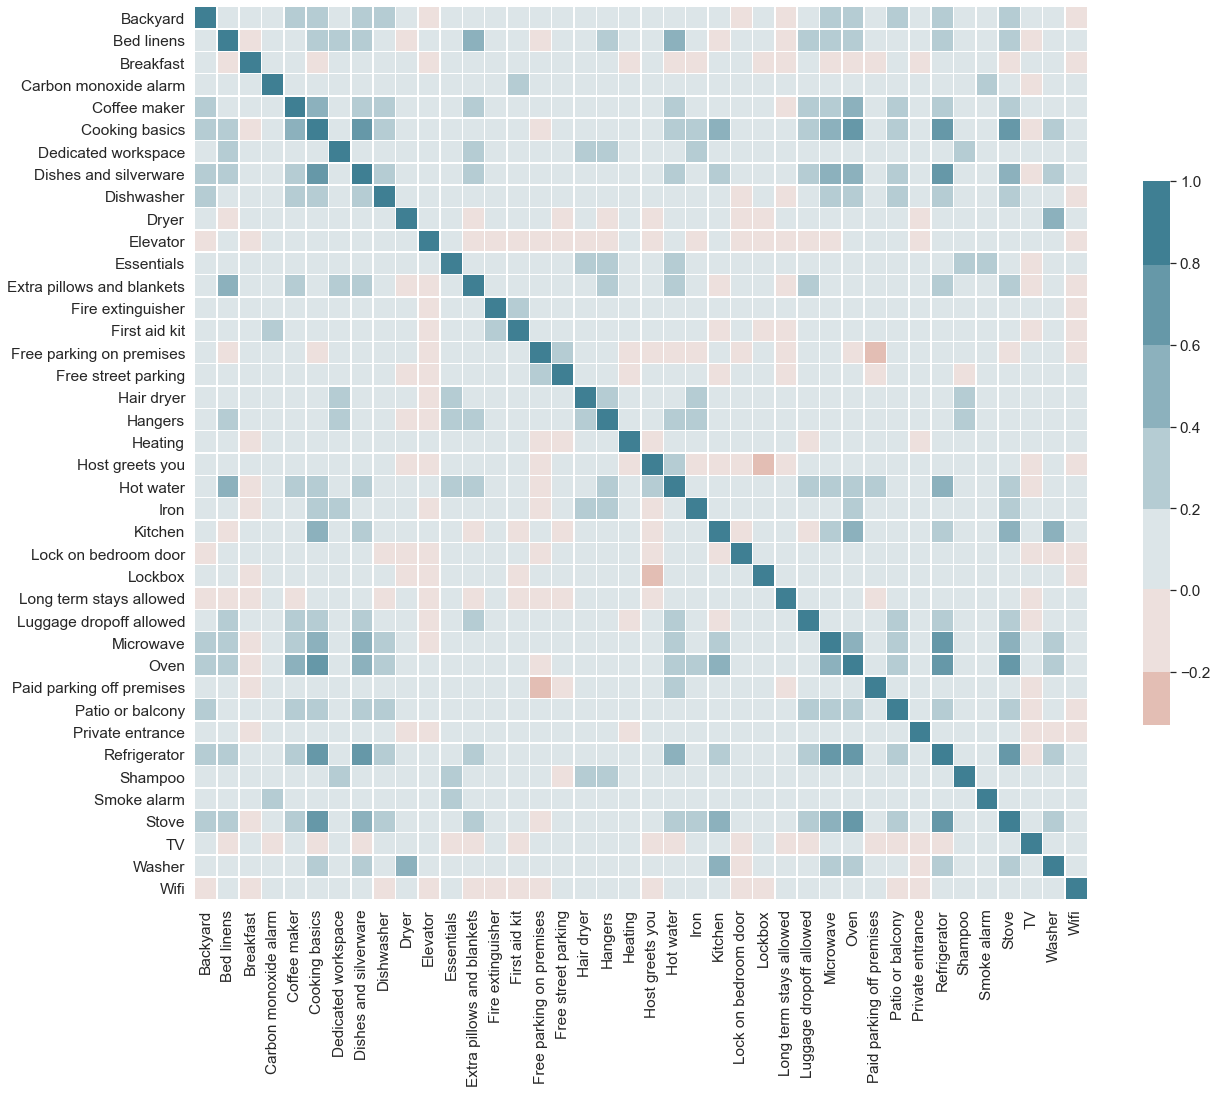

In [43]:
#plot correlation
corr = X_final.corr(method='pearson')
plt.figure(figsize=(20,20));
palette = sns.diverging_palette(20, 220, n=10);
sns.heatmap(corr,fmt=".2f", cmap=palette, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(40, 0));


## Perform clustering analysis

C:\Users\Nik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


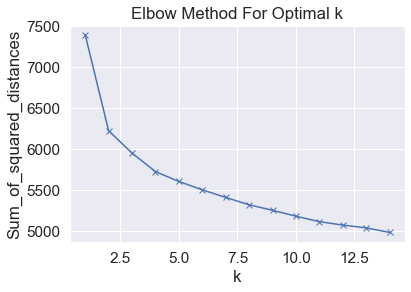

In [44]:
#elbow method to determine number of clusters
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,init="random")
    km = km.fit(X_final)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-');
plt.xlabel('k');
plt.ylabel('Sum_of_squared_distances');
plt.title('Elbow Method For Optimal k');
plt.show();

- it is difficult to interpret an obvious number of clusters, however, it looks as if the elbow occurs at 4 clusters

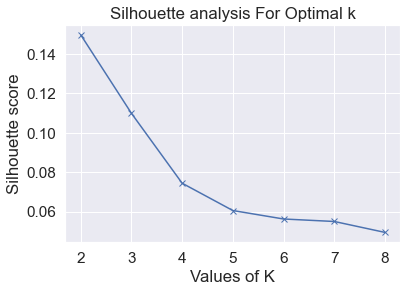

In [45]:
#calculate silhouette score
from sklearn.metrics import silhouette_score

sil_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in range_n_clusters:
 kmeans = KMeans(n_clusters = k,init="random").fit(X_final)
 labels = kmeans.labels_
 sil_avg.append(silhouette_score(X_final, labels, metric = 'euclidean'))
plt.plot(range_n_clusters,sil_avg,'bx-');
plt.xlabel('Values of K');
plt.ylabel('Silhouette score');
plt.title('Silhouette analysis For Optimal k');
plt.show();

- we can see that silhouette score is highest at 2 clusters

In [46]:
#create clusters using n=4
pd.options.mode.chained_assignment = None
X_cluster= X_final
X_cluster.loc[:,'cluster'] = KMeans(n_clusters=4,init="random").fit_predict(X_final)

In [47]:
#show df with clusters included in final column
display(X_cluster)

,Backyard,Bed linens,Breakfast,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,Dryer,...,Patio or balcony,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,cluster
listing_id,,,,,,,,,,,,,,,,,,,,,
29098736.0,0,1,0,1,1,1,1,1,0,0,...,0,0,1,1,1,0,1,0,1,0.0
1002115.0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,1.0
21255126.0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,1,0,1,1,1,1.0
33668694.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1.0
39173550.0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21310501.0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,2.0
23587481.0,0,0,0,0,1,0,1,1,0,0,...,0,0,1,1,1,0,1,0,1,3.0
14907588.0,0,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,1,1,1,1.0


In [48]:
#create pivot cluster
pivot_cluster = X_cluster.pivot_table(index=['cluster'], aggfunc='sum')
display(pivot_cluster)
category_colors = plt.get_cmap('hsv')(np.linspace(0, 1, len(pivot_cluster.columns)))

,Backyard,Bed linens,Breakfast,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,Dryer,...,Paid parking off premises,Patio or balcony,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi
cluster,,,,,,,,,,,,,,,,,,,,,
0.0,135,252,70,224,194,256,232,257,123,115,...,124,115,51,263,216,257,243,112,236,259
1.0,17,27,40,123,17,10,112,42,5,71,...,30,4,19,32,143,206,6,116,144,247
2.0,50,171,53,162,55,15,160,95,18,60,...,66,28,37,109,166,198,8,76,114,205
3.0,78,130,34,187,128,263,186,274,83,100,...,91,52,58,283,208,270,237,142,254,292


<ipython-input-49-2e33d85e13b9>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(1,10,idx+1);


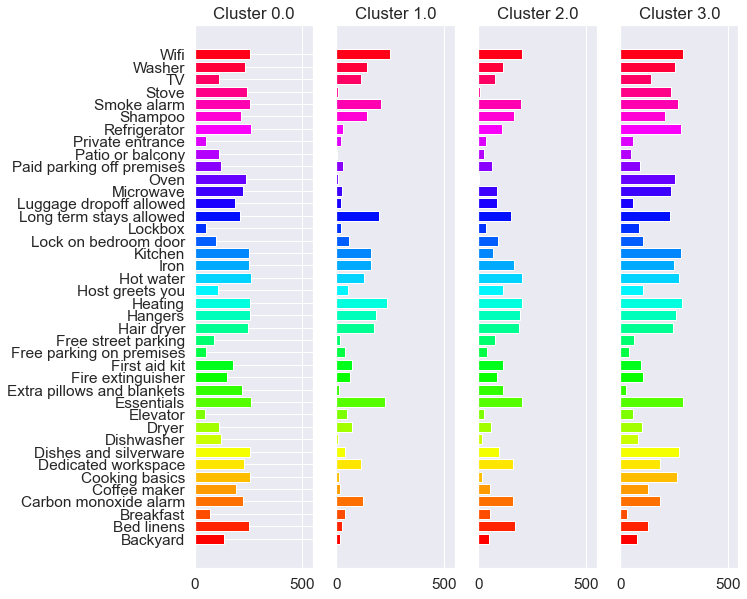

In [49]:
#plot chart showing spread of amenities across each cluster
plt.figure(figsize=(25, 10));
for idx, row in pivot_cluster.iterrows():
    plt.subplot(1,10,idx+1);
    plt.barh(row.index,row.values, color=category_colors);
    if(idx>0):
        plt.yticks([]);
    plt.xlim(0,550);
    plt.title(f'Cluster {idx}');

In [50]:
# show cluster label for each listing
resetindex= X_cluster.reset_index(level=0, inplace=False)
listings_cluster = resetindex[['listing_id','cluster']]
listings_cluster = listings_cluster.astype({'cluster': np.int64})
listings_cluster.head()

,listing_id,cluster
0,29098736.0,0
1,1002115.0,1
2,21255126.0,1
3,33668694.0,1
4,39173550.0,2


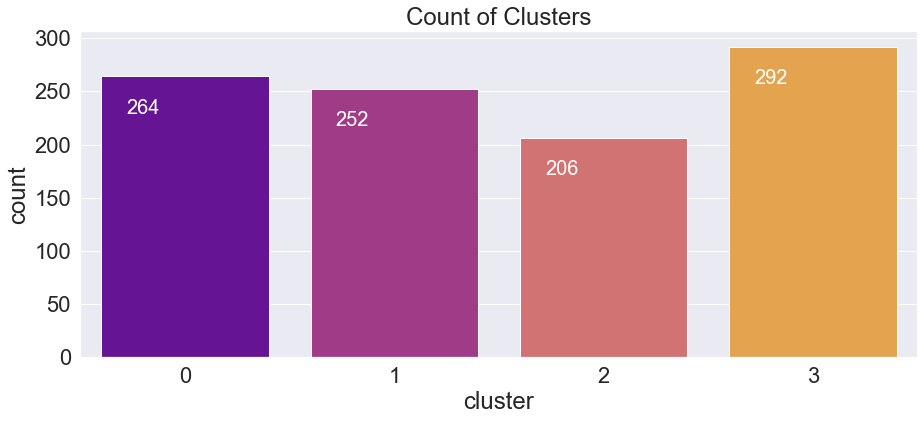

In [51]:
# plot count of clusters
plt.figure(figsize=(15,6));
sns.set(font_scale=2);
ax =sns.countplot(x='cluster',data=listings_cluster,palette='plasma');
plt.title("Count of Clusters");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20);
plt.show();

## Relabel cluster groups to abcd, based on cluster count

- label clusters in terms of a,b,c,d to ensure consistency each time I run the code
- if not then the cluster number varies each time
- we do this based on count in cluster, as each time I run the code, the cluster counts are very similar

In [52]:
#order clusters based on count
clusters_ordered =listings_cluster['cluster'].value_counts()
df_clusters_ordered=clusters_ordered.to_frame()
df_clusters_ordered.reset_index(inplace=True)
df_clusters_ordered.rename(columns={"index": "cluster_num", "cluster": "count"},inplace=True)

In [53]:
#create dictionary
df_clusters_ordered['cluster_letter']=['a','b','c','d']
zero_letter = df_clusters_ordered['cluster_letter'].loc[df_clusters_ordered['cluster_num']==0].values[0]
one_letter = df_clusters_ordered['cluster_letter'].loc[df_clusters_ordered['cluster_num']==1].values[0]
two_letter = df_clusters_ordered['cluster_letter'].loc[df_clusters_ordered['cluster_num']==2].values[0]
three_letter = df_clusters_ordered['cluster_letter'].loc[df_clusters_ordered['cluster_num']==3].values[0]
dictionary= dict({0: zero_letter,1: one_letter, 2: two_letter, 3: three_letter})


In [54]:
#replace all listings cluster number with letter
listings_cluster
listings_cluster=listings_cluster.replace({"cluster": dictionary})

In [55]:
#display listings_cluster to check
listings_cluster

,listing_id,cluster
0,29098736.0,b
1,1002115.0,c
2,21255126.0,c
3,33668694.0,c
4,39173550.0,d
...,...,...
1009,21310501.0,d
1010,23587481.0,a
1011,14907588.0,c
1012,21822406.0,a


In [56]:
#combine cluster label to df_budget_clean
df_budget_clean_copy = df_budget_clean

In [57]:
df_budget_clean =pd.merge(df_budget_clean_copy, listings_cluster, how='left', on=['listing_id'])
df_budget_clean.head()

,listing_id,host_id,host_is_superhost,neighbourhood,longitude,latitude,accommodates,bedrooms,bathrooms,property_type,amenities,room_type,price,reviews_rating,avg_sentiment_score,amenities_list,cluster
0,29098736.0,36868988,t,Wandsworth,-0.16479,51.47294,1,1.0,NaN,Private room in apartment,"[""Washer \u2013\u00a0In unit"", ""Bed linens"", ""...",Private room,40,100.0,0.900571,"[Washer – In unit, Bed linens, Hangers, Fire e...",b
1,1002115.0,4365977,t,Ealing,-0.28070,51.51073,3,1.0,NaN,Private room in house,"[""TV"", ""Essentials"", ""Host greets you"", ""Hair ...",Private room,39,96.0,0.828642,"[TV, Essentials, Host greets you, Hair dryer, ...",c
2,21255126.0,23536979,f,Hackney,-0.03611,51.55370,3,1.0,NaN,Private room in apartment,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...",Private room,29,94.0,0.727100,"[TV, Essentials, Kitchen, Washer, Hangers, Ele...",c
3,33668694.0,52746913,t,Kensington and Chelsea,-0.18227,51.48504,1,1.0,NaN,Private room in apartment,"[""Essentials"", ""Host greets you"", ""Hair dryer""...",Private room,34,98.0,0.969375,"[Essentials, Host greets you, Hair dryer, Sham...",c
4,39173550.0,300541498,f,Newham,-0.01258,51.53148,2,1.0,NaN,Private room in apartment,"[""Extra pillows and blankets"", ""Essentials"", ""...",Private room,45,98.0,0.744513,"[Extra pillows and blankets, Essentials, TV, H...",d


In [58]:
#locate chosen listing 
df_budget_clean.iloc[260]

listing_id                                                      481099.0
host_id                                                          2382601
host_is_superhost                                                      t
neighbourhood                                                    Hackney
longitude                                                       -0.04923
                                             ...                        
price                                                                 44
reviews_rating                                                      97.0
avg_sentiment_score                                             0.907375
amenities_list         [Paid parking off premises, Essentials, Kitche...
cluster                                                                c
Name: 260, Length: 17, dtype: object

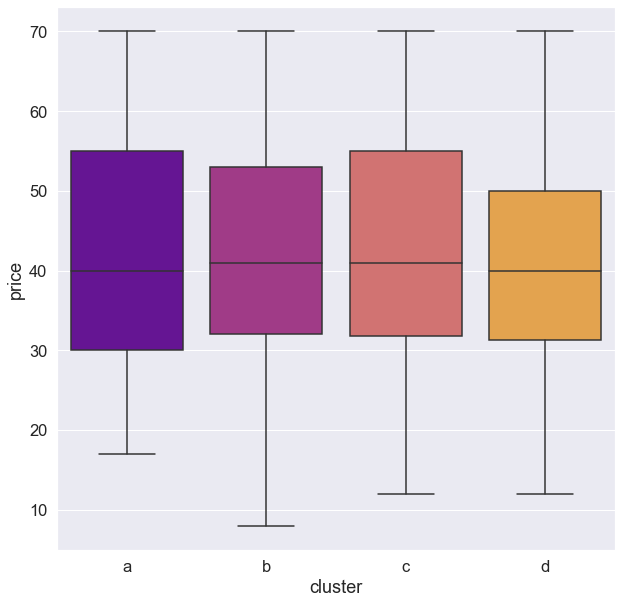

In [59]:
#analyse price and cluster group
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_budget_clean, x='cluster',y='price',palette='plasma',order=['a','b','c','d'])

- we can see the price is very similar within each cluster
- median price for cluster a and d is slighlty lower

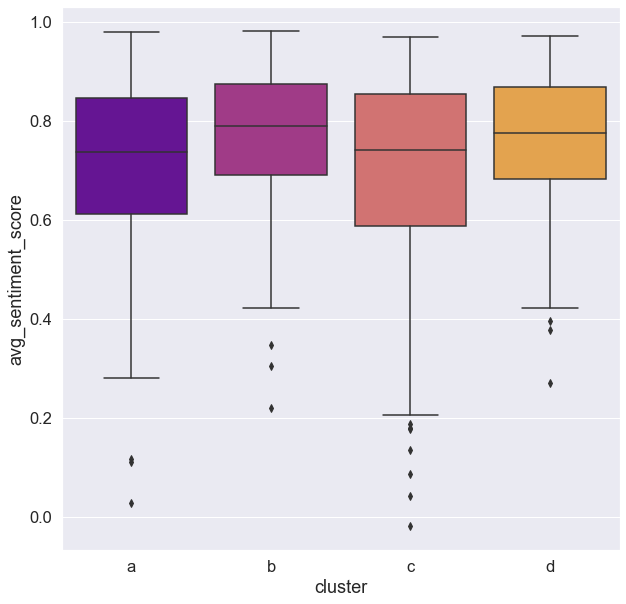

In [60]:
#analyse average sentiment score and cluster group
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_budget_clean, x='cluster',y='avg_sentiment_score',palette='plasma',order=['a','b','c','d'])

- we can see that the median average sentiment score is highest in cluster b
- clusters c and a have more spread, with a higher inter-quartile range

C:\Users\Nik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


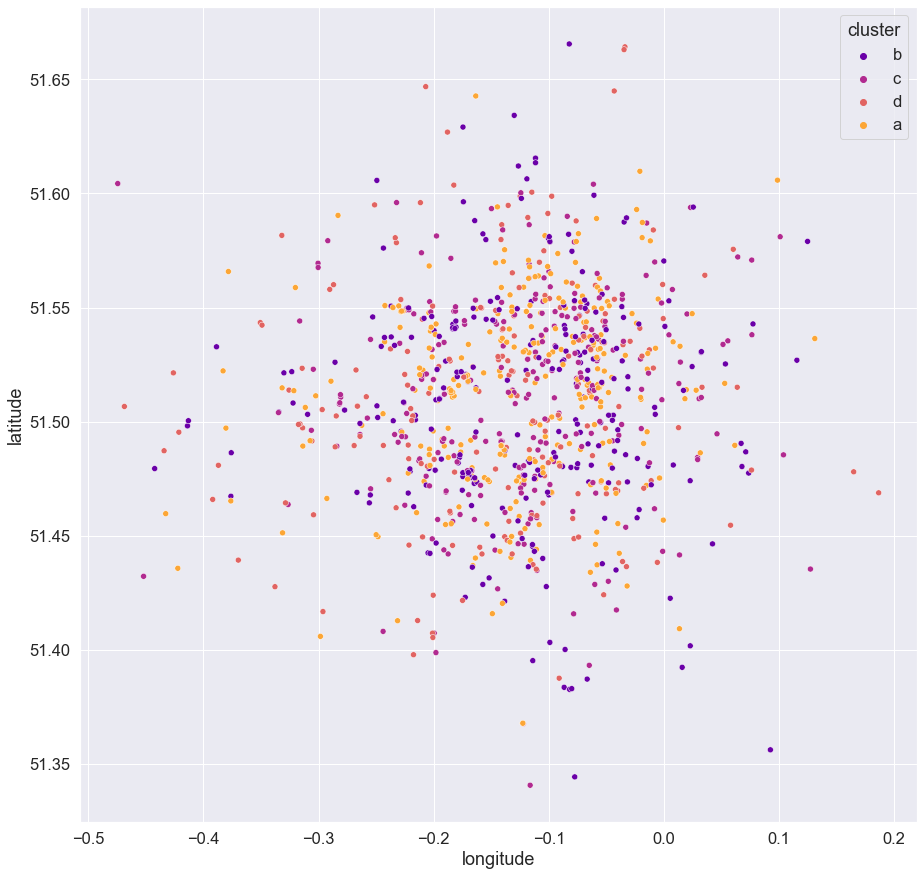

In [61]:
#analyse location with cluster group
plt.figure(figsize=(15,15));
sns.scatterplot(df_budget_clean.longitude,df_budget_clean.latitude,hue=df_budget_clean.cluster,palette='plasma');
plt.show();

- we can see that the cluster groups are well spread geographically

# <center>5.0 Regression Model 

## Visualising the dependent variable: avg_sentiment_score

C:\Users\Nik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


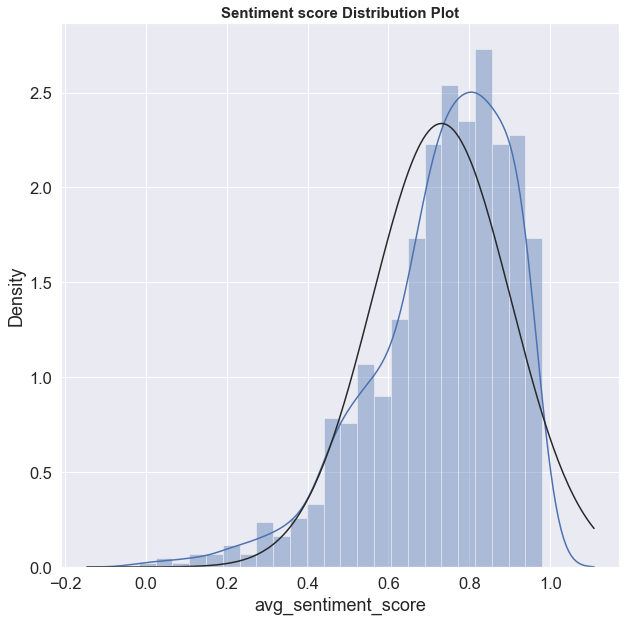

In [62]:
#plot dist of dependent variable: avg_sentiment_score
from scipy.stats import norm
plt.figure(figsize=(10,10));
sns.distplot(df_budget_clean['avg_sentiment_score'], fit=norm);
plt.title("Sentiment score Distribution Plot",size=15, weight='bold');

- we can see there is a negative skew
- we therefore try an exponential transformation

C:\Users\Nik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


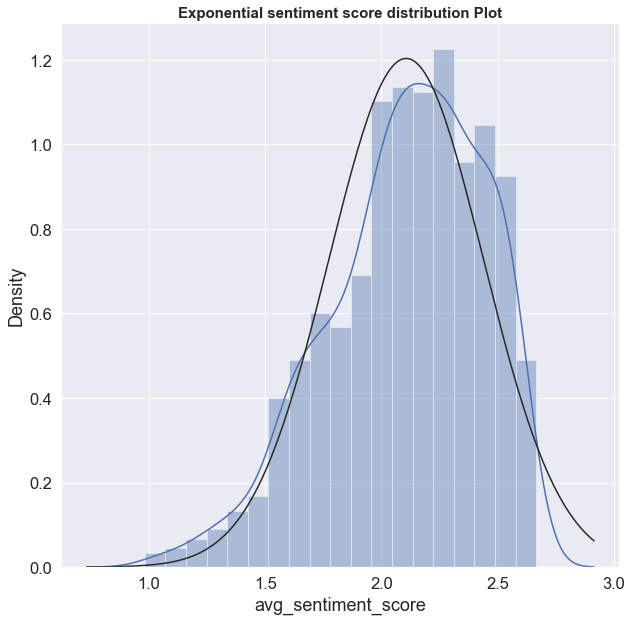

In [63]:
#plot dependent variable with exponential transformation
plt.figure(figsize=(10,10));
sns.distplot(np.exp(df_budget_clean['avg_sentiment_score']), fit=norm);
plt.title("Exponential sentiment score distribution Plot",size=15, weight='bold');

- distribution resembles normal slightly more
- limited improvement - may have to revert after further analysis

In [64]:
#define y and exp_y for future use
y = df_budget_clean.avg_sentiment_score
exp_y= np.exp(y)

In [65]:
# include relevant explanatory variables in the df, clean and format these variables
X=df_budget_clean.drop(columns=['listing_id','host_id','neighbourhood','amenities_list','amenities','bathrooms','property_type','latitude','longitude','avg_sentiment_score'])

X.bedrooms = X.bedrooms.fillna(0)
X['cluster'] = X['cluster'].astype(str)
X['bedrooms'] = X['bedrooms'].astype(np.int64)
X['reviews_rating'] = X['reviews_rating'].astype(np.int64)
X.head()
X.dtypes

host_is_superhost    object
accommodates          int64
bedrooms              int64
room_type            object
price                 int64
reviews_rating        int64
cluster              object
dtype: object

<Figure size 1080x432 with 0 Axes>

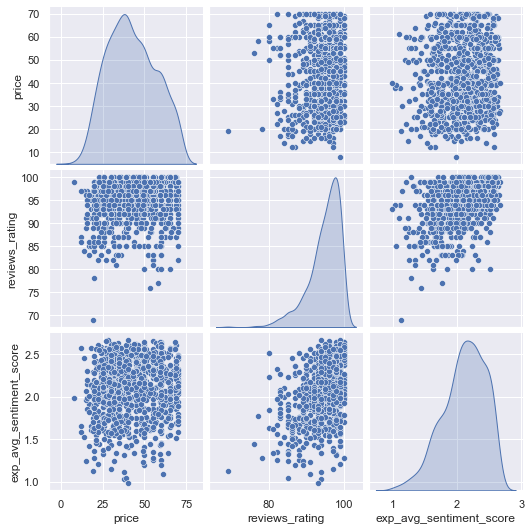

In [66]:
#Visualising numerical(continuous) data
X_num = X[['price','reviews_rating']]
X_num=X_num.assign(exp_avg_sentiment_score=exp_y)
sns.set(font_scale=1)
plt.figure(figsize=(15,6))
sns.pairplot(X_num, diag_kind='kde')
plt.show()

- fairly linear relationship between exp_avg_sentiment_score and reviews_rating
- limited correlation between other variables

In [67]:
#visualise catergorical variables
X_cat = X.select_dtypes(include=['object'])
X_cat=X_cat.assign(exp_avg_sentiment_score=exp_y)

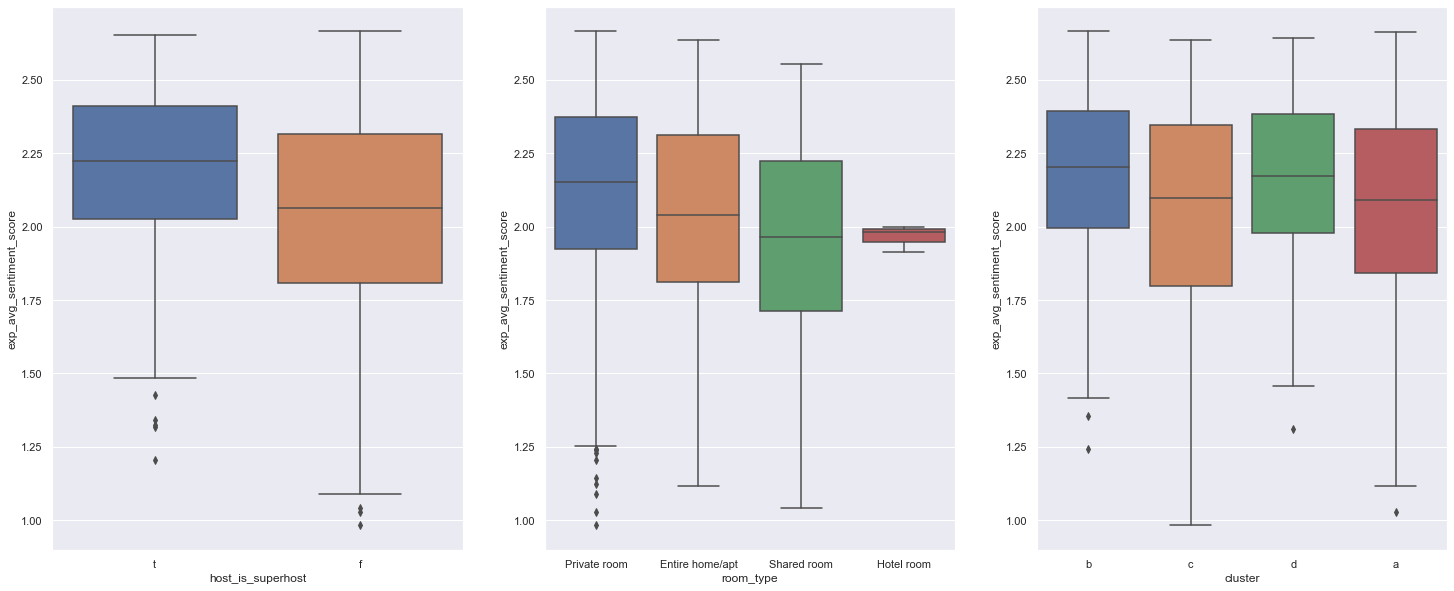

In [68]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'exp_avg_sentiment_score' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'host_is_superhost', y = 'exp_avg_sentiment_score', data = X_cat)
plt.subplot(1,3,2)
sns.boxplot(x = 'room_type', y = 'exp_avg_sentiment_score', data = X_cat)
plt.subplot(1,3,3)
sns.boxplot(x = 'cluster', y = 'exp_avg_sentiment_score', data = X_cat)
plt.show()

- We can see that superhosts have higher median sentiment scores, and less spread.
- We can see that private rooms and entire home/apt have the highest median sentiment scores.
- As expected, we see that cluster b has the highest median sentiment score.

In [69]:
# create a pipeline to format variables
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
from sklearn.preprocessing import OneHotEncoder

# Create a custom pipeline
class PreprocessingPipeline():

    def __init__(self):
        # Initialise the encoder and scaler
        self.hot_encoder = OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False)
        self.minmax_scaler = MinMaxScaler()
        
        # Prepare to store the column names
        self.scaled_columns = []
        self.coded_columns = []
    
    def fit(self, X, y=None, **fit_params):
        # Split X into object/categorical and int64/numeric columns
        X_cat, X_num = self._split_dtypes(X)
        
        # Fit the encoder to object/categorical data 
        self.hot_encoder.fit(X_cat)
        self.coded_columns = self.hot_encoder.get_feature_names_out(X_cat.columns)
        
        # Fit the scaler to int64/numeric data
        self.minmax_scaler.fit(X_num)
        self.scaled_columns = X_num.columns
        
        return self

    def transform(self, X, **transform_params):
        # Split X into object/categorical and int64/numeric columns
        X_cat, X_num = self._split_dtypes(X)
        
        #Transform the object/categorical data 
        X_cat_out = pd.DataFrame(self.hot_encoder.transform(X_cat),columns=self.coded_columns)
        
        #Transform the int64/numeric data
        X_num_out = pd.DataFrame(minmax_scaler.fit_transform(X_num),columns=self.scaled_columns)
        
        # Return the full processed data-frame
        return pd.concat([X_num_out, X_cat_out], axis=1)
    
    def _split_dtypes(self, X):
        return(X.select_dtypes(include=['object']),X.select_dtypes(include=['int64']))

In [70]:
#fit pipeline
my_pipe = PreprocessingPipeline()
my_pipe.fit(X)
df =my_pipe.transform(X)
df.head()

,accommodates,bedrooms,price,reviews_rating,host_is_superhost_t,room_type_Hotel room,room_type_Private room,room_type_Shared room,cluster_b,cluster_c,cluster_d
0,0.000000,0.2,0.516129,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.285714,0.2,0.500000,0.870968,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.285714,0.2,0.338710,0.806452,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.2,0.419355,0.935484,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.142857,0.2,0.596774,0.935484,0.0,0.0,1.0,0.0,0.0,0.0,1.0


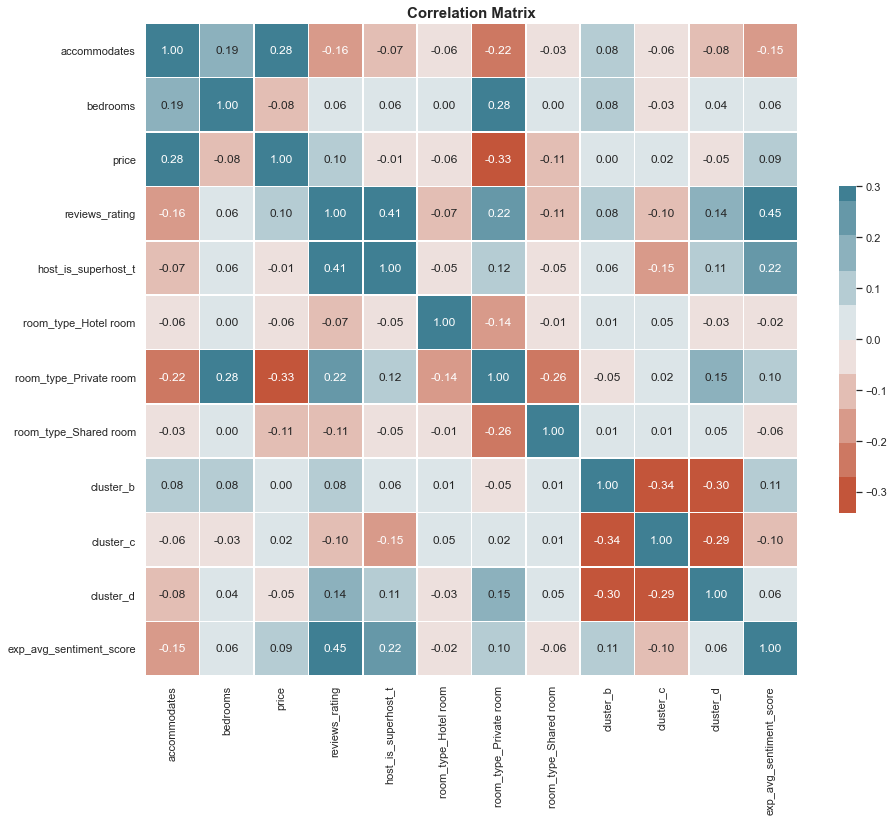

In [71]:
#correlation matrix
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=10)
df1=df.assign(exp_avg_sentiment_score=exp_y)
df1.head()
corr=df1.corr(method='pearson');
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(12, 0))
plt.title("Correlation Matrix",size=15, weight='bold');

- we can see that host_is_superhost_t is positively correlated with reviews_rating
- reviews_rating is positively correlated with exp_avg_sentiment_score

In [72]:
#VIF check

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(exog=df.values, exog_idx=i) for i in range(df.shape[1])]

# creating a new dataframe to report the results
vif_table = pd.DataFrame({'variable_name': df.columns, 'vif': np.around(vif,2)}).sort_values(by='vif',ascending=False)
print(vif_table)

             variable_name    vif
3           reviews_rating  24.59
6   room_type_Private room  11.51
1                 bedrooms   9.68
2                    price   8.23
0             accommodates   2.88
..                     ...    ...
8                cluster_b   1.96
9                cluster_c   1.89
10               cluster_d   1.81
7    room_type_Shared room   1.12
5     room_type_Hotel room   1.04

[11 rows x 2 columns]


- vif for reviews_rating is very high, perhaps this is due to high correlation between host_is_superhost_t

In [73]:
#therefore we drop host_is_superhost_t
df1= df.drop(['host_is_superhost_t'], axis = 1)

#check vif again
vif = [variance_inflation_factor(exog=df1.values, exog_idx=i) for i in range(df1.shape[1])]
vif_table = pd.DataFrame({'variable_name': df1.columns, 'vif': np.around(vif,2)}).sort_values(by='vif',ascending=False)
print("\n",vif_table)


             variable_name    vif
3          reviews_rating  21.75
5  room_type_Private room  11.46
1                bedrooms   9.68
2                   price   8.14
0            accommodates   2.87
7               cluster_b   1.96
8               cluster_c   1.87
9               cluster_d   1.81
6   room_type_Shared room   1.12
4    room_type_Hotel room   1.04


In [74]:
#still very high vif, so drop bedrooms
df2= df1.drop(['bedrooms'], axis = 1)

In [75]:
#check vif again
vif = [variance_inflation_factor(exog=df2.values, exog_idx=i) for i in range(df2.shape[1])]
vif_table = pd.DataFrame({'variable_name': df2.columns, 'vif': np.around(vif,2)}).sort_values(by='vif',ascending=False)
print("\n",vif_table)


             variable_name    vif
2          reviews_rating  20.73
4  room_type_Private room   9.64
1                   price   8.13
0            accommodates   2.55
6               cluster_b   1.94
7               cluster_c   1.86
8               cluster_d   1.80
5   room_type_Shared room   1.09
3    room_type_Hotel room   1.03


In [76]:
#drop room_type_Private_room as it has a high vif
df3= df2.drop(['room_type_Private room'], axis = 1)

#check vif again
vif = [variance_inflation_factor(exog=df3.values, exog_idx=i) for i in range(df3.shape[1])]
vif_table = pd.DataFrame({'variable_name': df3.columns, 'vif': np.around(vif,2)}).sort_values(by='vif',ascending=False)
print("\n",vif_table)


            variable_name   vif
2         reviews_rating  8.84
1                  price  7.45
0           accommodates  2.55
5              cluster_b  1.94
6              cluster_c  1.81
7              cluster_d  1.76
4  room_type_Shared room  1.02
3   room_type_Hotel room  1.01


In [77]:
#we drop price
df4= df3.drop(['price'], axis = 1)

#check vif again
vif = [variance_inflation_factor(exog=df4.values, exog_idx=i) for i in range(df4.shape[1])]
vif_table = pd.DataFrame({'variable_name': df4.columns, 'vif': np.around(vif,2)}).sort_values(by='vif',ascending=False)
print("\n",vif_table)



            variable_name   vif
1         reviews_rating  4.57
0           accommodates  2.20
4              cluster_b  1.94
5              cluster_c  1.80
6              cluster_d  1.76
3  room_type_Shared room  1.02
2   room_type_Hotel room  1.01


- vif is still high for reviews_rating, however we decide to keep it due to the high correlation with the dependent variable

In [78]:
#assign constantfit model
X = df4.assign(const=1)
results = sm.OLS(exp_y, X).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_sentiment_score   R-squared:                       0.221
Model:                             OLS   Adj. R-squared:                  0.216
Method:                  Least Squares   F-statistic:                     40.78
Date:                 Tue, 11 Jan 2022   Prob (F-statistic):           1.10e-50
Time:                         18:26:43   Log-Likelihood:                -192.50
No. Observations:                 1014   AIC:                             401.0
Df Residuals:                     1006   BIC:                             440.4
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
accommodates        

In [79]:
#remove room type shared room and hotel room as they have high p values
X = df4.drop(["room_type_Hotel room","room_type_Shared room"],axis=1).assign(const=1)
results = sm.OLS(exp_y, X).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_sentiment_score   R-squared:                       0.221
Model:                             OLS   Adj. R-squared:                  0.217
Method:                  Least Squares   F-statistic:                     57.14
Date:                 Tue, 11 Jan 2022   Prob (F-statistic):           2.16e-52
Time:                         18:26:43   Log-Likelihood:                -192.63
No. Observations:                 1014   AIC:                             397.3
Df Residuals:                     1008   BIC:                             426.8
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
accommodates      -0.2491      0.0

# <center> 6.0 Evaluating model

## Assumptions: Linear functional form and constant error variance

In [81]:
#plot dependent variable against continuous variables
#we only have the continuous variable: reviews_rating in our model

In [82]:
#define dataframes with different transformations
df_with_y=df.assign(avg_sentiment_score=y)
df_with_exp_y=df_with_y.assign(exp_avg_sentiment_score=exp_y)


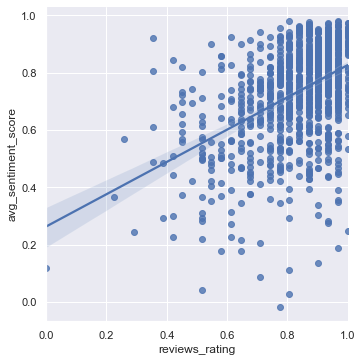

In [83]:
#plot x with y with no transformations
sns.lmplot(x='reviews_rating',y='avg_sentiment_score',data=df_with_y);

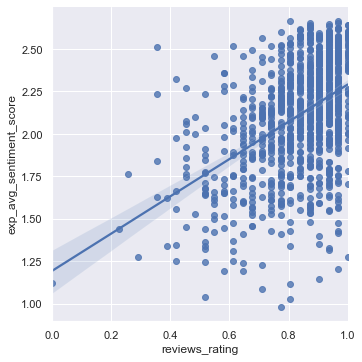

In [84]:
#plot x against exponential y
sns.lmplot(x='reviews_rating',y='exp_avg_sentiment_score',data=df_with_exp_y);

In [85]:
#build model using y NOT exp_y
results = sm.OLS(y, X).fit()
print(results.summary())
y.head()

                             OLS Regression Results                            
Dep. Variable:     avg_sentiment_score   R-squared:                       0.222
Model:                             OLS   Adj. R-squared:                  0.218
Method:                  Least Squares   F-statistic:                     57.49
Date:                 Tue, 11 Jan 2022   Prob (F-statistic):           1.10e-52
Time:                         18:26:43   Log-Likelihood:                 480.89
No. Observations:                 1014   AIC:                            -949.8
Df Residuals:                     1008   BIC:                            -920.3
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
accommodates      -0.1297      0.0

0    0.900571
1    0.828642
2    0.727100
3    0.969375
4    0.744513
Name: avg_sentiment_score, dtype: float64

- looks like the best model in terms of R squared is with no transformation on y, and log transformation on reviews_rating
- However, assumption of constant variance of dependent variable is not completely satisfied
- we can see that even with an exponential transformation, there is still more variance in the initial values of x


## Assumption : errors are normally distributed

<AxesSubplot:ylabel='Count'>

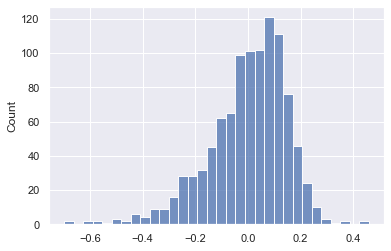

In [86]:
#plot histogram of residuals
sns.histplot(results.resid)

- we can see that this assumption is not perfect, however it does represent a normal distribution

In [87]:
#Multicollinearity check again
vif = [variance_inflation_factor(exog=X.values, exog_idx=i) for i in range(X.shape[1])]
vif_table = pd.DataFrame({'variable_name': X.columns, 'vif': np.around(vif,2)}).sort_values(by='vif',ascending=False)
print("\n",vif_table)


     variable_name    vif
5           const  44.45
2       cluster_b   1.43
3       cluster_c   1.41
4       cluster_d   1.40
1  reviews_rating   1.06
0    accommodates   1.04


- we ignore constant
- vif values are low suggesting no evidence of multicollinearity

In [88]:
# checking the correlation table
X.corr(method = 'pearson')

,accommodates,reviews_rating,cluster_b,cluster_c,cluster_d,const
accommodates,1.000000,-0.155353,0.076951,-0.057175,-0.075637,NaN
reviews_rating,-0.155353,1.000000,0.084335,-0.104642,0.140185,NaN
cluster_b,0.076951,0.084335,1.000000,-0.341188,-0.299571,NaN
cluster_c,-0.057175,-0.104642,-0.341188,1.000000,-0.290369,NaN
cluster_d,-0.075637,0.140185,-0.299571,-0.290369,1.000000,NaN
const,NaN,NaN,NaN,NaN,NaN,NaN


# Evaluate model using test and train set

In [89]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [90]:
#fit and predict model
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict( X_test)

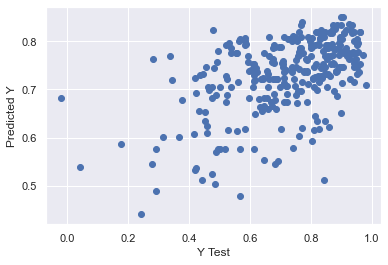

In [91]:
#scatter plot
plt.scatter(y_test,predictions);
plt.xlabel('Y Test');
plt.ylabel('Predicted Y');

- poor model performance as expected from the low R squared value

In [92]:
# calculate metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 0.11708067134289621
MSE: 0.02260898614994188
RMSE: 0.15036284830350174


- since the sentiment scores range from -1 to 1, mse is not as useful
- MAE is still relatively high

C:\Users\Nik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


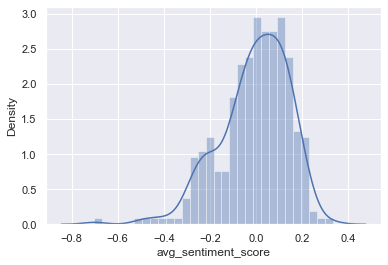

In [93]:
#plot residuals
sns.distplot((y_test-predictions),bins=30);

- residuals are fairly normally distributed

In [94]:
# show cluster group of listing
df_budget_clean.loc[df_budget_clean['listing_id']==481099]

,listing_id,host_id,host_is_superhost,neighbourhood,longitude,latitude,accommodates,bedrooms,bathrooms,property_type,amenities,room_type,price,reviews_rating,avg_sentiment_score,amenities_list,cluster
260,481099.0,2382601,t,Hackney,-0.04923,51.55865,2,1.0,NaN,Private room in house,"[""Paid parking off premises"", ""Essentials"", ""K...",Private room,44,97.0,0.907375,"[Paid parking off premises, Essentials, Kitche...",c


# Predict sentiment score using model

In [95]:
#find index of current listing
df_with_y.loc[df_with_y['avg_sentiment_score']==0.907375]

,accommodates,bedrooms,price,reviews_rating,host_is_superhost_t,room_type_Hotel room,room_type_Private room,room_type_Shared room,cluster_b,cluster_c,cluster_d,avg_sentiment_score
260,0.142857,0.2,0.580645,0.903226,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.907375


- index is 260

In [96]:
current_listing =X.iloc[260]
current_listing.array.reshape(1,6)
array = np.zeros(6)
#prediction in next cell requires 2d array
A = np.vstack([current_listing, array])
#A is 2d matrix with first row as the current listing

In [97]:
#predict sentiment score
prediction = lm.predict(A)
print("predicted sentiment score:",prediction[0])
print("actual sentiment score: 0.907375")

predicted sentiment score: 0.7473974985489971
actual sentiment score: 0.907375


C:\Users\Nik\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


- we can see that this was not predicted well

## Compare cluster groups

In [98]:

cluster_group =df_budget_clean['cluster'].loc[df_budget_clean['listing_id']==481099].values[0]
print("cluster group of current listing is:",cluster_group)

cluster group of current listing is: c


<ipython-input-99-2b928482451f>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(1,10,idx+1)


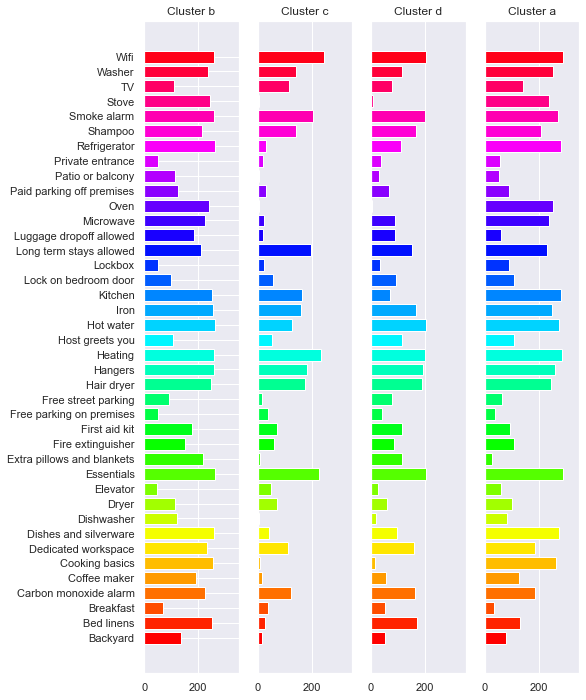

In [99]:
#display useful cluster/amentities chart again
category_colors = plt.get_cmap('hsv')(np.linspace(0, 1, len(pivot_cluster.columns)))
plt.figure(figsize=(20, 12))
for idx, row in pivot_cluster.iterrows():
    plt.subplot(1,10,idx+1)
    plt.barh(row.index,row.values, color=category_colors)
    if(idx>0):
        plt.yticks([])
    plt.xlim(0,350)
    cluster_name= dictionary[idx]
    plt.title(f'Cluster {cluster_name}')

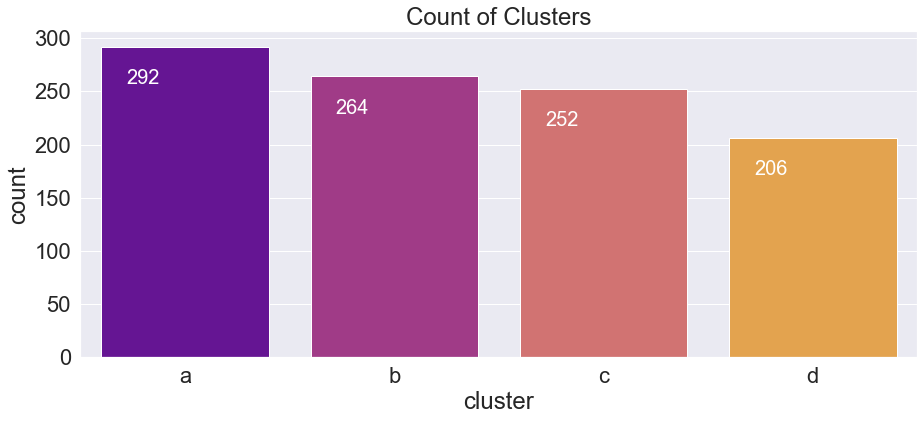

In [100]:
#display count of listings
plt.figure(figsize=(15,6));
sns.set(font_scale=2);
ax =sns.countplot(x='cluster',data=listings_cluster,palette='plasma',order=['a','b','c','d']);
plt.title("Count of Clusters");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20);
plt.show();

In [101]:
#display amenities in listing again
X_cluster.reset_index(inplace=True)





# 7.0 Managerial implications





- from analysis, amenities in cluster b may be associated with higher EWOM

In [102]:
#display current listing amenities
current_listing_amenities = X_cluster.loc[X_cluster['listing_id']==481099]
current_listing_amenities = current_listing_amenities.drop(columns=['cluster','listing_id'])
amenities_list=[]
for (colname,colval) in current_listing_amenities.iteritems():
    if colval.values>0:
        amenities_list.append(colname) 
        print(colname)

Carbon monoxide alarm
Dedicated workspace
Dryer
Essentials
Hair dryer
Hangers
Heating
Host greets you
Hot water
Iron
Kitchen
Lock on bedroom door
Paid parking off premises
Shampoo
Washer
Wifi


In [103]:
#average number of amenities offered from before
df_amenities = X_final.drop(columns=['listing_id','cluster'])
df_amenities.sum(axis=1).mean()

21.238658777120314

In [104]:
#number of amenities offered by current listing
len(amenities_list)

16

- we can see that this listing offers significantly less amenenites (16) compared to competitor set (21.24)